In [ ]:
import  numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


# New Section

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

<ipython-input-4-fc1cae0f000d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


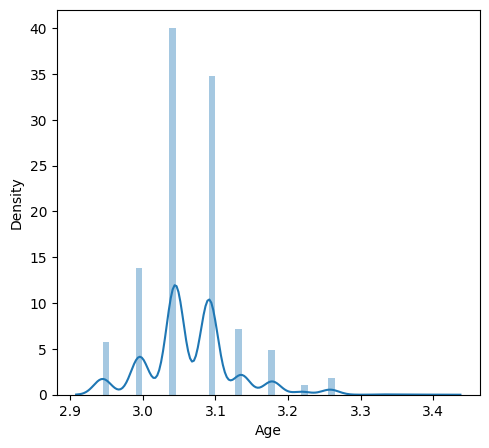

In [ ]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)

transformationplot(np.log(df['Age'])) 


In [ ]:
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])

df=df.replace(['Computer Science','Information Technology','Electronics and Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])


In [ ]:
df=df.drop(['Hostel'],axis=1)
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,Electronics And Communication,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


<ipython-input-7-f92659182652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

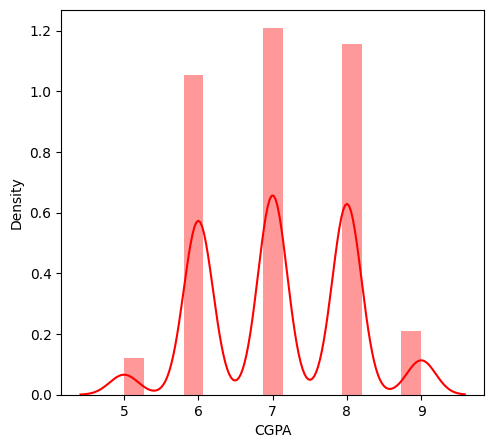

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<ipython-input-8-5e468beb8a0d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='r')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

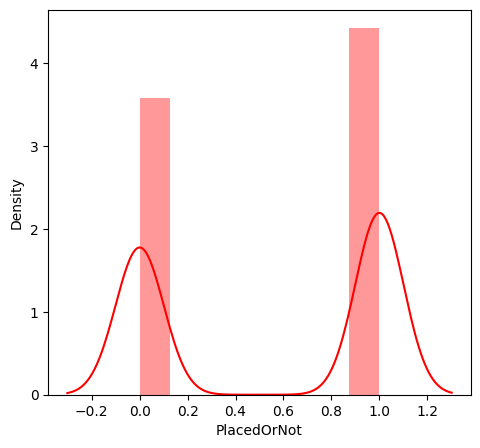

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

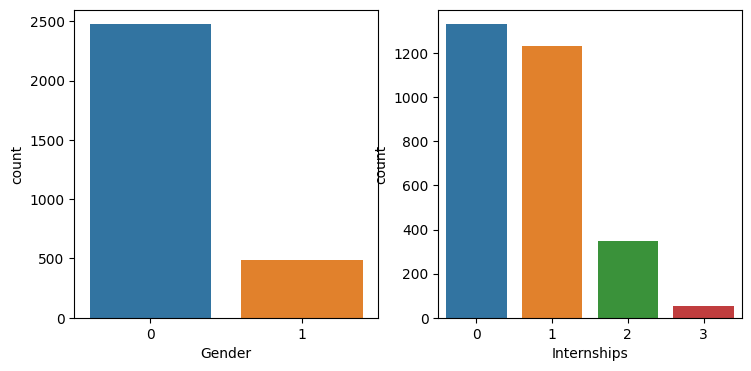

In [ ]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x=df['Gender'])
plt.subplot(1,4,2)
sns.countplot(x=df['Internships'])
plt.show()


<Axes: xlabel='PlacedOrNot', ylabel='count'>

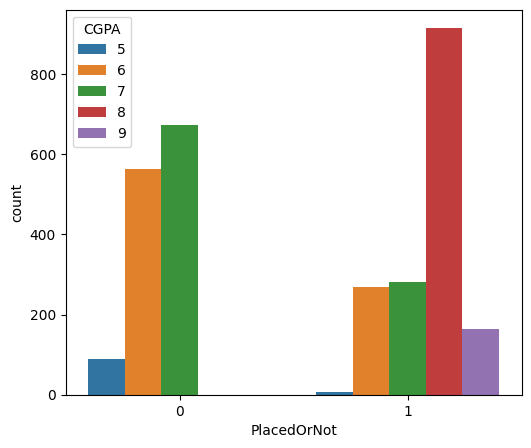

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x=df["PlacedOrNot"],hue=df['CGPA'])

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


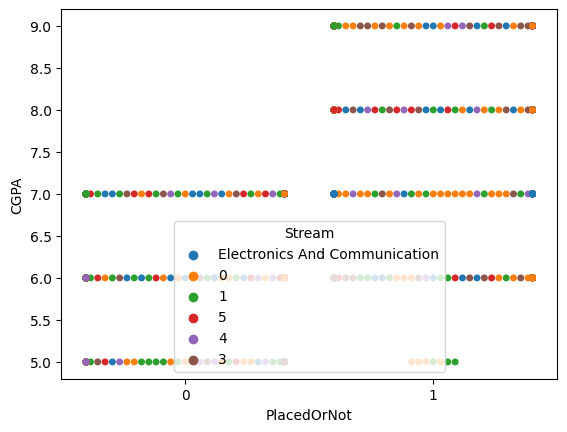

In [ ]:
sns.swarmplot(x='PlacedOrNot',y='CGPA',hue='Stream',data=df)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=pd.read_csv("collegePlace.csv")
x=df[['Age']]
df['Age']=sc.fit_transform(x)
print(df['Age'])

0       0.388131
1      -0.366752
2       0.388131
3      -0.366752
4       0.388131
          ...   
2961    1.143013
2962    1.143013
2963    0.388131
2964    0.388131
2965    1.143013
Name: Age, Length: 2966, dtype: float64


In [ ]:
from numpy.core.fromnumeric import shape
from sklearn.model_selection import train_test_split
x=df.drop('PlacedOrNot',axis=1)
y=df['PlacedOrNot']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=0)
df.shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2372, 7)
(594, 7)
(2372,)
(594,)


In [ ]:
# Importing the necessary libraries 
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import  confusion_matrix,accuracy_score 

# Importing the dataset from the sklearn library into a local variable called dataset
dataset = load_digits()
x_train, x_test, y_train, y_test = train_test_split(dataset.data, dataset.target,test_size=0.30, random_state=4)
Classifier = SVC(kernel="linear")
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
confusion_mat = confusion_matrix(y_test,y_pred)
print("Accuracy for SVM is:",accuracy)


Accuracy for SVM is: 0.9796296296296296


In [ ]:
best_k={"Regular":0}
best_score={"Regular":0}
for k in range(3,50,2):
    knn_temp=KNeighborsClassifier(n_neighbors=k)    
    knn_temp.fit(x_train,y_train)
    knn_temp_pred=knn_temp.predict(x_test) 
    score=metrics.accuracy_score(y_test,knn_temp_pred)*100
    if score >= best_score["Regular"]and score < 100:
      best_score["Regular"] = score
      best_k["Regular"]=k
      print("---Result---\nk:{}\n:score:{}".format(best_k,best_score))
      knn=KNeighborsClassifier(n_neighbors=best_k["Regular"])
      knn.fit(x_train,y_train)
      knn_pred=knn.predict(x_test)
      tested=accuracy_score(knn_pred,y_test)

---Result---
k:{'Regular': 3}
:score:{'Regular': 98.51851851851852}
---Result---
k:{'Regular': 5}
:score:{'Regular': 98.51851851851852}


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers


In [ ]:
classifier=Sequential()
classifier.add(keras.layers.Dense(6,activation='relu',input_dim=6))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(6,activation='relu'))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(1,activation='sigmoid'))



In [ ]:
loss_1=tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss_1,metrics=["accuracy"])

In [ ]:
import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model=pickle.load(open('placement.pkl','rb'))